In [30]:
import numpy as np
import random


In [102]:
bidders = [Bidder(5, 5, .1), Bidder(5, 5, .5)]

In [103]:
balances = dict.fromkeys(np.arange(0, len(bidders)), 0)

In [104]:
balances

{0: 0, 1: 0}

In [105]:
# step 1: select a User at random
round_user = 1

# step 2: call all bidders to bid with User and collect bids
bids_list = []
for bidder in bidders:
    bids_list.append(bidder.bid(user_id=round_user))

# step 3: select auction winner
# find the index at the highest bid
winning_bidder = np.argmax(bids_list)
# check for tie first place bids
tie_winners = [i for i, e in enumerate(bids_list)
                    if e == bids_list[winning_bidder]
                    and i != winning_bidder]
# if tie bids
if tie_winners:
    # In the event that more than one Bidder ties for the highest bid,
    #  one of the highest Bidders is selected at random, each with
    #  equal probability.
    tie_winners.append(winning_bidder)
    winning_bidder = random.choice(tie_winners)

# step 4: find the winning price (second highest bid)
# take the max
# In the event of a tie, highest price is max bid
if tie_winners:
    winning_price = max(bids_list)
else:
    winning_price = max(n for n in bids_list if n !=
                        bids_list[winning_bidder])

    
user_click = True

# step 6: notify each bidder if they won or not and what the winning
# price was
for idx, bidder in enumerate(bidders):
    if idx == winning_bidder:
        # send the winning bidder the results
        bidder.notify(auction_winner=True, price=winning_price,
                      clicked=user_click)
    else:
        # otherwise, update other bidders
        bidder.notify(auction_winner=False, price=winning_price,
                      clicked=None)

# step 7: update bidder balance
# Balance is increased by 1 dollar if the User clicked (0 dollars if
# the user did not click).
if user_click:
    balances[winning_bidder] += 1
# Balance is decreased by the winning price (whether or not clicked).
balances[winning_bidder] -= winning_price

In [106]:
print(f"""
winning bidder: {winning_bidder}
winning price: {winning_price}
bidder's balance: {balances[winning_bidder]}
""")


winning bidder: 1
winning price: 0.1
bidder's balance: 0.9



In [107]:
balances

{0: 0, 1: 0.9}

In [78]:
class Bidder:
    """
    Each Bidder begins with a balance of 0 dollars. The objective is to finish
    the game with as high a balance as possible. At some points during the
    game, the Bidder 's balance may become negative. If you Bidder 's balance
    goes below -1000 dollars then your Bidder will be disqualified from the
    Auction and further bidding.

    Attributes
    ----------
    num_users : int
        The number of User objects in the game
    num_rounds : int
        The number of round to be played

    Methods
    -------
    bid(user_id)
        Generate a bid given a user_id
    notify(auction_winner, price, clicked)
        Information received after a bid has been placed
    """

    def __init__(self, num_users, num_rounds, bid_amount=3.333):
        # the number of User objects in the game
        self.num_users = num_users
        # contains the total number of rounds to be played
        self.num_rounds = num_rounds
        self.bid_amount=bid_amount

    def __repr__(self):
        pass

    def __str__(self):
        pass

    def bid(self, user_id):
        """
        Returns a non-negative amount of money to bid, in dollars.
        Round to three decimal places.

        Params
        -------
        user_id : int
            The id of the user

        Returns
        -------
        float
            The non-negative amount to bid on the ad
        """
        # TODO: initially a static method for testing
        #  returns a non-negative amount of money, in dollars round to three
        #  (3) decimal places.
        return self.bid_amount

    def notify(self, auction_winner, price, clicked):
        """
        Update the bidder with information about what happened at the end of
        each Auction round.

        Params
        -------
        auction_winner : bool
            Represent whether the given Bidder won the auction ( True )
            or not ( False )
        price : float
            The amount of the second bid, which the winner pays.
        clicked : bool or None
            If the bidder won the auction, clicked will contain a boolean value
            to represent whether or not the user clicked on the ad. Otherwise
            None.
        """
        # TODO: update global attributes with this information on more
        #  sophisticated bidders



        return


In [79]:
b0, b1, b2 = Bidder(1,10), Bidder(1,10), Bidder(1,10)

In [323]:
"""
This is the Auction module. This module contains the User Class and the Auction
class. An Auction is A game, involving a set of Bidders and a set of Users.
Bidders place bids and the winning bidder gets to show their ad to the User.
"""

import random
import numpy as np
import matplotlib.pyplot as plt


class User:
    """
    Each user has a user_id. Each user has a secret probability of clicking on
    an ad. The events of clicking on each ad are mutually independent. When a
    user is created, the secret probability is drawn from a uniform
    distribution from 0 to 1.

    Attributes
    ----------
    __probability : float
        probability attribute to represent the probability of clicking on
        an ad.

    Methods
    -------
    show_ad()
        Represents showing an ad to this User. Returns True if the user
        clicks on the ad.
    """

    def __init__(self):
        # probability attribute to represent the probability of clicking on
        # an ad.
        self.__probability = np.random.uniform(0, 1)

    def __repr__(self):
        return str(self.__probability)

    def __str__(self):
        return f"Probability of response: {self.__probability}"

    def show_ad(self):
        """
        Represents showing an ad to this User. Returns True if the user
        clicks on the ad.

        Returns
        -------
        bool
            True if a user clicks on the ad
        """
        # Returns true if random value is < the user's probability
        if np.random.uniform(0, 1) < self.__probability:
            return True
        return False


class Auction:
    """
    A game, involving a set of Bidders and a set of Users. Each round
    represents a user navigating to a site for an ad. Bidders will place bids
    and the winning bidder gets to show their ad to the User and see the
    results (clicked or did not click). The highest bidder wins but the price
    paid is the second-highest bid

    Attributes
    ----------
    users : list
        list of all User objects
    bidders : list
        list of all bidder objects
    balances : dict
        dictionary of the current balance of every Bidder; initially 0
    _balances_per_round : list of lists
        The balances each round

    Methods
    -------
    execute_round()
        Executes all steps within a single round of the game
    plot_history()
        creates a visual representation of how the auction has proceeded
    """

    def __init__(self, users, bidders):
        # list of all User objects.
        self.users = users
        # list of all Bidder objects.
        self.bidders = bidders
        # dictionary of the current balance of every Bidder; initially 0
        self.balances = dict.fromkeys(np.arange(0, len(self.bidders)), 0)
        # list of the balances each round for plotting
        self._balances_per_round = [[] for i in self.bidders]

    def __repr__(self):
        return str(self.balances)

    def __str__(self):
        auction_str = "Auction balances: \n"
        for bidder, balance in self.balances.items():
            auction_str += f"Bidder {bidder}: ${balance}\n"
        return auction_str

    def execute_round(self):
        """
        The Auction occurs in rounds, and the total number of rounds is
        num_rounds . In each round, a second-price auction is conducted for a
        randomly chosen User.

        Each round represents an event in which a User navigates to a website
        with a space for an ad. Bidders place bids and the winner gets to show
        their ad to the user. The user may clock on the add or not click on
        the ad and the winning Bidder gets to observe the behavior.
        """
        # step 1: select a User at random
        round_user = random.choice(self.users)
        round_user_index = self.users.index(round_user)

        # step 2: call all bidders to bid with User and collect bids
        bids_list = []
        for bidder in self.bidders:
            bids_list.append(bidder.bid(user_id=round_user_index))

        # step 3: select auction winner
        # find the index at the highest bid
        winning_bidder = np.argmax(bids_list)
        # check for tie first place bids
        tie_winners = [i for i, e in enumerate(bids_list)
                            if e == bids_list[winning_bidder]
                            and i != winning_bidder]
        # if tie bids
        if tie_winners:
            # In the event that more than one Bidder ties for the highest bid,
            #  one of the highest Bidders is selected at random, each with
            #  equal probability.
            tie_winners.append(winning_bidder)
            winning_bidder = random.choice(tie_winners)

        # step 4: find the winning price (second highest bid)
        # take the max
        # In the event of a tie, highest price is max bid
        if tie_winners:
            winning_price = max(bids_list)
        # if there is only one bidder, winning_price is the bidder's bid
        elif len(bids_list) == 1:
            winning_price = bids_list[winning_bidder]
        # otherwise, the second place bid wins
        else:
            winning_price = max(n for n in bids_list
                                if n != bids_list[winning_bidder])

        # step 5: show the user the ad and retrieve results
        user_click = round_user.show_ad()

        # step 6: notify each bidder if they won or not and what the winning
        # price was
        for idx, bidder in enumerate(self.bidders):
            if idx == winning_bidder:
                # send the winning bidder the results
                bidder.notify(auction_winner=True, price=winning_price,
                              clicked=user_click)
            else:
                # otherwise, update other bidders
                bidder.notify(auction_winner=False, price=winning_price,
                              clicked=None)

        # step 7: update bidder balance
        # Balance is increased by 1 dollar if the User clicked (0 dollars if
        # the user did not click).
        if user_click:
            self.balances[winning_bidder] += 1
        # Balance is decreased by the winning price (whether or not clicked).
        self.balances[winning_bidder] -= winning_price

        # If a Bidder's balance goes below -1000 dollars, then the Bidder will
        # be disqualified from the Auction and further bidding.
        if self.balances[winning_bidder] < -1000:
            # remove the bidder
            del self.bidders[winning_bidder]
            # remove from balances as well
            del self.balances[winning_bidder]

        # step 8: update data for plotting
        for i in range(0, len(self.balances)):
            self._balances_per_round[i].append(self.balances[i])

    def plot_history(self):
        """
        # (optional) creates a visual representation of how the auction has
        # proceeded.

        # There is a problem with the autograder that it cannot import
        # matplotlib so comment out before submitting
        """
        # plot the data
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        # the x axis is the number of rounds
        rounds = np.arange(0, len(self._balances_per_round[0]))

        # plot
        for idx, balances in enumerate(self._balances_per_round):
            plt.plot(rounds, balances, label=f"Bidder {idx+1}")

        # include the legend
        plt.legend()

        # labels
        plt.xlabel("Number of Rounds")
        plt.ylabel("Bidder Balances")
        ax.set_title('Bidder Balances Over Time')

        # display the plot
        plt.show()


In [222]:
b0, b1, b2 = Bidder(1,10), Bidder(1,10), Bidder(1,10)
auction = Auction([User()],[b0, b1, b2])
auction.execute_round()
auction.balances

{0: -3.333, 1: 0, 2: 0}

In [223]:
print(auction)

Auction balances: 
Bidder 0: $-3.333
Bidder 1: $0
Bidder 2: $0



In [224]:
for bidder, balance in auction.balances.items():
    print(bidder)
    print(balance)

0
-3.333
1
0
2
0


In [225]:
auction.execute_round()
auction.balances

{0: -3.333, 1: 0, 2: -3.333}

In [226]:
auction = Auction([User()],[Bidder(1,10)])
auction.execute_round()
auction.balances

{0: -3.333}

In [235]:
b0, b1, b2 = Bidder(1,10), Bidder(1,10), Bidder(1,10)
auction = Auction([User()],[b0, b1, b2])
for i in range(0, 10):
    auction.execute_round()

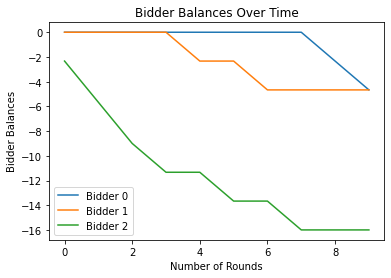

In [238]:
auction.plot_history()

In [563]:
"""
This is the Auction module. This module contains the User Class and the Auction
class. An Auction is A game, involving a set of Bidders and a set of Users.
Bidders place bids and the winning bidder gets to show their ad to the User.
"""

import random
import numpy as np
import matplotlib.pyplot as plt


class User:
    """
    Each user has a user_id. Each user has a secret probability of clicking on
    an ad. The events of clicking on each ad are mutually independent. When a
    user is created, the secret probability is drawn from a uniform
    distribution from 0 to 1.

    Attributes
    ----------
    __probability : float
        probability attribute to represent the probability of clicking on
        an ad.

    Methods
    -------
    show_ad()
        Represents showing an ad to this User. Returns True if the user
        clicks on the ad.
    """

    def __init__(self):
        # probability attribute to represent the probability of clicking on
        # an ad.
        self.__probability = np.random.uniform(0, 1)

    def __repr__(self):
        return str(self.__probability)

    def __str__(self):
        return f"Probability of response: {self.__probability}"

    def show_ad(self):
        """
        Represents showing an ad to this User. Returns True if the user
        clicks on the ad.

        Returns
        -------
        bool
            True if a user clicks on the ad
        """
        # Returns true if random value is < the user's probability
        if np.random.uniform(0, 1) < self.__probability:
            return True
        return False


class Auction:
    """
    A game, involving a set of Bidders and a set of Users. Each round
    represents a user navigating to a site for an ad. Bidders will place bids
    and the winning bidder gets to show their ad to the User and see the
    results (clicked or did not click). The highest bidder wins but the price
    paid is the second-highest bid

    Attributes
    ----------
    users : list
        list of all User objects
    bidders : list
        list of all bidder objects
    balances : dict
        dictionary of the current balance of every Bidder; initially 0
    balances_per_round : list of lists
        The balances each round

    Methods
    -------
    execute_round()
        Executes all steps within a single round of the game
    plot_history()
        creates a visual representation of how the auction has proceeded
    """

    def __init__(self, users, bidders):
        # list of all User objects.
        self.users = users
        # list of all Bidder objects.
        self.bidders = bidders
        # dictionary of the current balance of every Bidder; initially 0
        self.balances = dict.fromkeys(np.arange(0, len(self.bidders)), 0)
        # list of the balances each round for plotting
        self.balances_per_round = [[] for i in self.bidders]

    def __repr__(self):
        return str(self.balances)

    def __str__(self):
        auction_str = "Auction balances: \n"
        for bidder, balance in self.balances.items():
            auction_str += f"Bidder {bidder}: ${balance}\n"
        return auction_str

    def execute_round(self):
        """
        The Auction occurs in rounds, and the total number of rounds is
        num_rounds . In each round, a second-price auction is conducted for a
        randomly chosen User.

        Each round represents an event in which a User navigates to a website
        with a space for an ad. Bidders place bids and the winner gets to show
        their ad to the user. The user may clock on the add or not click on
        the ad and the winning Bidder gets to observe the behavior.
        """
        # step 1: select a User at random
        round_user = random.choice(self.users)
        round_user_index = self.users.index(round_user)

        # step 2: call all bidders to bid with User and collect bids
        bids_list = []
        for bidder in self.bidders:
            bids_list.append(bidder.bid(user_id=round_user_index))

        # step 3: select auction winner
        # find the index at the highest bid
        winning_bidder = np.argmax(bids_list)
        # check for tie first place bids
        tie_winners = [i for i, e in enumerate(bids_list)
                            if e == bids_list[winning_bidder]
                            and i != winning_bidder]
        # if tie bids
        if tie_winners:
            # In the event that more than one Bidder ties for the highest bid,
            #  one of the highest Bidders is selected at random, each with
            #  equal probability.
            tie_winners.append(winning_bidder)
            winning_bidder = random.choice(tie_winners)

        # step 4: find the winning price (second highest bid)
        # take the max
        # In the event of a tie, highest price is max bid
        if tie_winners:
            winning_price = max(bids_list)
        # if there is only one bidder, winning_price is the bidder's bid
        elif len(bids_list) == 1:
            winning_price = bids_list[winning_bidder]
        # otherwise, the second place bid wins
        else:
            winning_price = max(n for n in bids_list
                                if n != bids_list[winning_bidder])

        # step 5: show the user the ad and retrieve results
        user_click = round_user.show_ad()

        # step 6: notify each bidder if they won or not and what the winning
        # price was
        for idx, bidder in enumerate(self.bidders):
            if idx == winning_bidder:
                # send the winning bidder the results
                bidder.notify(auction_winner=True, price=winning_price,
                              clicked=user_click)
            else:
                # otherwise, update other bidders
                bidder.notify(auction_winner=False, price=winning_price,
                              clicked=None)

        # step 7: update bidder balance
        # Balance is increased by 1 dollar if the User clicked (0 dollars if
        # the user did not click).
        if user_click:
            self.balances[winning_bidder] += 1
        # Balance is decreased by the winning price (whether or not clicked).
        self.balances[winning_bidder] -= winning_price

        # If a Bidder's balance goes below -1000 dollars, then the Bidder will
        # be disqualified from the Auction and further bidding.
        if self.balances[winning_bidder] < -1000:
            # remove the bidder
            del self.bidders[winning_bidder]
            # remove from balances as well
            del self.balances[winning_bidder]

        # step 8: update data for plotting
        for i in range(0, len(self.balances)):
            self.balances_per_round[i].append(self.balances[i])

    def plot_history(self):
        """
        # (optional) creates a visual representation of how the auction has
        # proceeded.

        # There is a problem with the autograder that it cannot import
        # matplotlib so comment out before submitting
        """
        # plot the data
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        # the x axis is the number of rounds
        rounds = np.arange(0, len(self.balances_per_round[0]))

        # plot
        for idx, balances in enumerate(self.balances_per_round):
            plt.plot(rounds, balances, label=f"Bidder {idx+1}")

        # include the legend
        plt.legend()

        # labels
        plt.xlabel("Number of Rounds")
        plt.ylabel("Bidder Balances")
        ax.set_title('Bidder Balances Over Time')

        # display the plot
        plt.show()


In [564]:
import random

import numpy as np


class StaticBidder:
    """
    Each Bidder begins with a balance of 0 dollars. The objective is to finish
    the game with as high a balance as possible. At some points during the
    game, the Bidder 's balance may become negative. If you Bidder 's balance
    goes below -1000 dollars then your Bidder will be disqualified from the
    Auction and further bidding.

    Attributes
    ----------
    num_users : int
        The number of User objects in the game
    num_rounds : int
        The number of round to be played
    balance : float
        The current balance of the bidder
    rounds_left : int
        Number of rounds remaining

    Methods
    -------
    bid(user_id)
        Generate a bid given a user_id
    notify(auction_winner, price, clicked)
        Information received after a bid has been placed
    """

    def __init__(self, num_users, num_rounds, bid_amount=.5):
        # the number of User objects in the game
        self.num_users = num_users
        # contains the total number of rounds to be played
        self.num_rounds = num_rounds
        # goal is to maximize balance
        self.balance = 0
        self.rounds_left = num_rounds
        self.bid_amount = bid_amount

    def __repr__(self):
        pass

    def __str__(self):
        pass

    def bid(self, user_id):
        """
        Returns a non-negative amount of money to bid, in dollars.
        Round to three decimal places.

        Params
        -------
        user_id : int
            The id of the user

        Returns
        -------
        float
            The non-negative amount to bid on the ad
        """

        return self.bid_amount

    def notify(self, auction_winner, price, clicked):
        """
        Update the bidder with information about what happened at the end of
        each Auction round.

        Params
        -------
        auction_winner : bool
            Represent whether the given Bidder won the auction ( True )
            or not ( False )
        price : float
            The amount of the second bid, which the winner pays.
        clicked : bool or None
            If the bidder won the auction, clicked will contain a boolean value
            to represent whether or not the user clicked on the ad. Otherwise
            None.
        """

        # if the bidder won
        if auction_winner:
            # update balance
            # Balance is increased by 1 if the User clicked (0 if not).
            if clicked:
                self.balance += 1
            # Balance is decreased by the winning price regardless
            self.balance -= price

        # update number of rounds left
        self.rounds_left -= 1

        return


class RandomBidder:
    """
    Each Bidder begins with a balance of 0 dollars. The objective is to finish
    the game with as high a balance as possible. At some points during the
    game, the Bidder 's balance may become negative. If you Bidder 's balance
    goes below -1000 dollars then your Bidder will be disqualified from the
    Auction and further bidding.

    Attributes
    ----------
    num_users : int
        The number of User objects in the game
    num_rounds : int
        The number of round to be played
    balance : float
        The current balance of the bidder
    rounds_left : int
        Number of rounds remaining

    Methods
    -------
    bid(user_id)
        Generate a bid given a user_id
    notify(auction_winner, price, clicked)
        Information received after a bid has been placed
    """

    def __init__(self, num_users, num_rounds, max_bid=1):
        # the number of User objects in the game
        self.num_users = num_users
        # contains the total number of rounds to be played
        self.num_rounds = num_rounds
        # goal is to maximize balance
        self.balance = 0
        self.rounds_left = num_rounds
        self.max_bid = max_bid

    def __repr__(self):
        pass

    def __str__(self):
        pass

    def bid(self, user_id):
        """
        Returns a non-negative amount of money to bid, in dollars.
        Round to three decimal places.

        Params
        -------
        user_id : int
            The id of the user

        Returns
        -------
        float
            The non-negative amount to bid on the ad
        """

        return np.random.uniform(0, self.max_bid)

    def notify(self, auction_winner, price, clicked):
        """
        Update the bidder with information about what happened at the end of
        each Auction round.

        Params
        -------
        auction_winner : bool
            Represent whether the given Bidder won the auction ( True )
            or not ( False )
        price : float
            The amount of the second bid, which the winner pays.
        clicked : bool or None
            If the bidder won the auction, clicked will contain a boolean value
            to represent whether or not the user clicked on the ad. Otherwise
            None.
        """
        # TODO: update global attributes with this information on more
        #  sophisticated bidders

        # if the bidder won
        if auction_winner:
            # update balance
            # Balance is increased by 1 if the User clicked (0 if not).
            if clicked:
                self.balance += 1
            # Balance is decreased by the winning price regardless
            self.balance -= price
            # TODO: update results for user_id

        # update number of rounds left
        self.rounds_left -= 1

        return


class BetaDistributionBidder:
    """
    Each Bidder begins with a balance of 0 dollars. The objective is to finish
    the game with as high a balance as possible. At some points during the
    game, the Bidder 's balance may become negative. If you Bidder 's balance
    goes below -1000 dollars then your Bidder will be disqualified from the
    Auction and further bidding.

    Attributes
    ----------
    num_users : int
        The number of User objects in the game
    num_rounds : int
        The number of round to be played
    balance : float
        The current balance of the bidder
    rewards_by_user : list
        List of rewards (number of clicks) by user
    penalties_by_user : list
        List of penalties (missed bids) by user
    last_user : None or int
        The user_id of the most recent user bid on

    Methods
    -------
    bid(user_id)
        Generate a bid given a user_id
    notify(auction_winner, price, clicked)
        Information received after a bid has been placed
    """

    def __init__(self, num_users, num_rounds):
        # the number of User objects in the game
        self.num_users = num_users
        # contains the total number of rounds to be played
        self.num_rounds = num_rounds
        # goal is to maximize balance
        self.balance = 0

        # To begin with, all machines are assumed to have a uniform
        # distribution of the probability of success
        self.rewards_by_user = [.5] * num_users
        self.penalties_by_user = [.5] * num_users
        self.last_user = None

    def __repr__(self):
        return str(self.balance)

    def __str__(self):
        bidder_str = ""
        for i in range(0, self.num_users):
            current_bid = self.rewards_by_user[i] / \
                          (self.rewards_by_user[i] + self.penalties_by_user[i])
            attempts = self.rewards_by_user[i] + self.penalties_by_user[i]
            successes = self.rewards_by_user[i]
            bidder_str += f"User {i}: (Attempts: {attempts}, Successes: " \
                          f"{successes}, Current bid: ${current_bid})\n"
        return bidder_str

    def bid(self, user_id):
        """
        Returns a non-negative amount of money to bid, in dollars.
        Round to three decimal places.

        Params
        -------
        user_id : int
            The id of the user

        Returns
        -------
        float
            The non-negative amount to bid on the ad
        """
        # update performance based on user_id
        self.last_user = user_id

        # For each observation, we will iterate through each machine and will
        # select the machine with the highest random beta distribution.
        bid_amount = self.rewards_by_user[user_id] \
                     / (self.rewards_by_user[user_id] +
                        self.penalties_by_user[user_id])

        return round(bid_amount, 3)

    def notify(self, auction_winner, price, clicked):
        """
        Update the bidder with information about what happened at the end of
        each Auction round.

        Params
        -------
        auction_winner : bool
            Represent whether the given Bidder won the auction ( True )
            or not ( False )
        price : float
            The amount of the second bid, which the winner pays.
        clicked : bool or None
            If the bidder won the auction, clicked will contain a boolean value
            to represent whether or not the user clicked on the ad. Otherwise
            None.
        """

        # if the bidder won
        if auction_winner:
            # update balance
            # Balance is increased by 1 if the User clicked (0 if not).
            if clicked:
                self.balance += 1
                # update last user
                self.rewards_by_user[self.last_user] += 1
            else:
                # update last user
                self.penalties_by_user[self.last_user] += 1
            # Balance is decreased by the winning price regardless
            self.balance -= price


class BetaDistributionWithMinBidder:
    """
    Each Bidder begins with a balance of 0 dollars. The objective is to finish
    the game with as high a balance as possible. At some points during the
    game, the Bidder 's balance may become negative. If you Bidder 's balance
    goes below -1000 dollars then your Bidder will be disqualified from the
    Auction and further bidding.

    Attributes
    ----------
    num_users : int
        The number of User objects in the game
    num_rounds : int
        The number of round to be played
    balance : float
        The current balance of the bidder
    rewards_by_user : list
        List of rewards (number of clicks) by user
    penalties_by_user : list
        List of penalties (missed bids) by user
    last_user : None or int
        The user_id of the most recent user bid on

    Methods
    -------
    bid(user_id)
        Generate a bid given a user_id
    notify(auction_winner, price, clicked)
        Information received after a bid has been placed
    """

    def __init__(self, num_users, num_rounds):
        # the number of User objects in the game
        self.num_users = num_users
        # contains the total number of rounds to be played
        self.num_rounds = num_rounds
        # goal is to maximize balance
        self.balance = 0

        # To begin with, all machines are assumed to have a uniform
        # distribution of the probability of success
        self.rewards_by_user = [.5] * num_users
        self.penalties_by_user = [.5] * num_users
        self.last_user = None

    def __repr__(self):
        return str(self.balance)

    def __str__(self):
        bidder_str = ""
        for i in range(0, self.num_users):
            current_bid = self.rewards_by_user[i] / \
                          (self.rewards_by_user[i] + self.penalties_by_user[i])
            attempts = self.rewards_by_user[i] + self.penalties_by_user[i]
            successes = self.rewards_by_user[i]
            bidder_str += f"User {i}: (Attempts: {attempts}, Successes: " \
                          f"{successes}, Current bid: ${current_bid})\n"
        return bidder_str

    def bid(self, user_id):
        """
        Returns a non-negative amount of money to bid, in dollars.
        Round to three decimal places.

        Params
        -------
        user_id : int
            The id of the user

        Returns
        -------
        float
            The non-negative amount to bid on the ad
        """
        # update performance based on user_id
        self.last_user = user_id

        if (self.rewards_by_user[user_id] + self.penalties_by_user[user_id]) \
                < 10:
            return 1
        # For each observation, we will iterate through each machine and will
        # select the machine with the highest random beta distribution.
        bid_amount = self.rewards_by_user[user_id] \
                     / (self.rewards_by_user[user_id] +
                        self.penalties_by_user[user_id])

        return round(bid_amount, 3)

    def notify(self, auction_winner, price, clicked):
        """
        Update the bidder with information about what happened at the end of
        each Auction round.

        Params
        -------
        auction_winner : bool
            Represent whether the given Bidder won the auction ( True )
            or not ( False )
        price : float
            The amount of the second bid, which the winner pays.
        clicked : bool or None
            If the bidder won the auction, clicked will contain a boolean value
            to represent whether or not the user clicked on the ad. Otherwise
            None.
        """

        # if the bidder won
        if auction_winner:
            # update balance
            # Balance is increased by 1 if the User clicked (0 if not).
            if clicked:
                self.balance += 1
                # update last user
                self.rewards_by_user[self.last_user] += 1
            else:
                # update last user
                self.penalties_by_user[self.last_user] += 1
            # Balance is decreased by the winning price regardless
            self.balance -= price



In [565]:
# auction params
rounds = 10000
num_users = 10

users = []
for i in range(0, num_users):
    users.append(User())
beta = BetaDistributionBidder(num_users, rounds)
beta2 = BetaDistributionWithMinBidder(num_users, rounds)
bidders = [RandomBidder(num_users, rounds, max_bid=.5),
           RandomBidder(num_users, rounds, max_bid=1),  
           StaticBidder(num_users, rounds, bid_amount=.5),
           beta, 
           beta2
          ]
auction = Auction(users=users, bidders=bidders)

# execute auction
for i in range(0, rounds):
    auction.execute_round()

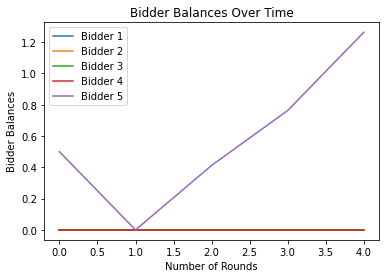

In [582]:
auction.plot_history()

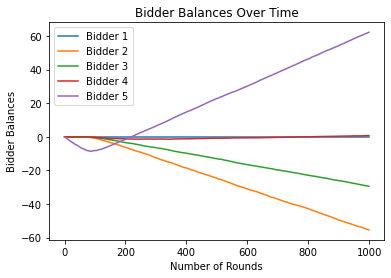

In [658]:
games = 100
rounds = 1000
num_users = 10
balances_per_round_per_game = []

for game in range(0, games):
    users = []
    for i in range(0, num_users):
        users.append(User())
        
    beta = BetaDistributionBidder(num_users, rounds)
    beta2 = BetaDistributionWithMinBidder(num_users, rounds)
    
    bidders = [RandomBidder(num_users, rounds, max_bid=.5),
               RandomBidder(num_users, rounds, max_bid=1),  
               StaticBidder(num_users, rounds, bid_amount=.5),
               beta, 
               beta2
              ]
    auction = Auction(users=users, bidders=bidders)

    # execute auction
    for i in range(0, rounds):
        auction.execute_round()
        
    # save the results
    balances_per_round_per_game.append(auction.balances_per_round)

# average the results
balances_per_bidder = [[] for i in bidders]

for game in range(0, len(balances_per_round_per_game)):
    for bidder in range(0, len(bidders)):
        a=np.array([balances_per_round_per_game[game]])
        balances_per_bidder[bidder].extend(a[:, bidder])
        
average_balances_by_bidder = np.average(balances_per_bidder, axis=1)

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# the x axis is the number of rounds
rounds = np.arange(0, len(average_balances_by_bidder[0]))

# plot
for idx, balances in enumerate(average_balances_by_bidder):
    plt.plot(rounds, balances, label=f"Bidder {idx+1}")

# include the legend
plt.legend()

# labels
plt.xlabel("Number of Rounds")
plt.ylabel("Bidder Balances")
ax.set_title('Bidder Balances Over Time')

# display the plot
plt.show()

In [646]:
balances_per_bidder = [[] for i in bidders]

for game in range(0, len(balances_per_round_per_game)):
    for bidder in range(0, len(bidders)):
        a=np.array([balances_per_round_per_game[game]])
        balances_per_bidder[bidder].extend(a[:, bidder])
        
average_balances_by_bidder = np.average(balances_per_bidder, axis=1)

In [647]:
average_balances_by_bidder

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.06070059, -0.16828236, -0.31278079, -0.40984878, -0.40984878]])

In [637]:
a=np.array([balances_per_round_per_game[0]])
a[:, 0]

array([[0., 0., 0., 0., 0.]])

In [613]:
balances_per_round_per_game[:][1]

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0.3785988256363465,
  0.6634352848991967,
  1.1634352848991967,
  0.6634352848991967,
  1.1634352848991967]]

In [600]:
balances_per_round_per_game[1][1]

[0, 0, 0, 0, 0]

In [601]:
np.average([[2, 3, 5], [2, 3, 5], [2, 3, 5]], axis=0)

array([2., 3., 5.])

In [570]:
avg_balances_per_round

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0

In [555]:
beta.balance

-2.569936519023876

In [556]:
print(beta2)

User 0: (Attempts: 916.0, Successes: 839.5, Current bid: $0.9164847161572053)
User 1: (Attempts: 940.0, Successes: 863.5, Current bid: $0.9186170212765957)
User 2: (Attempts: 10.0, Successes: 4.5, Current bid: $0.45)
User 3: (Attempts: 10.0, Successes: 3.5, Current bid: $0.35)
User 4: (Attempts: 571.0, Successes: 317.5, Current bid: $0.5560420315236427)
User 5: (Attempts: 10.0, Successes: 3.5, Current bid: $0.35)
User 6: (Attempts: 995.0, Successes: 967.5, Current bid: $0.9723618090452262)
User 7: (Attempts: 10.0, Successes: 2.5, Current bid: $0.25)
User 8: (Attempts: 10.0, Successes: 1.5, Current bid: $0.15)
User 9: (Attempts: 768.0, Successes: 581.5, Current bid: $0.7571614583333334)



In [557]:
beta = beta2

In [558]:
bids_by_user = []
for i in range(0, num_users):
    print(users[i])
    print("attempts: ", (beta.rewards_by_user[i] + beta.penalties_by_user[i]))
    print("successes: ", beta.rewards_by_user[i])
    print("current bid", beta.rewards_by_user[i] / (beta.rewards_by_user[i] + beta.penalties_by_user[i]))

Probability of response: 0.917947117450534
attempts:  916.0
successes:  839.5
current bid 0.9164847161572053
Probability of response: 0.9271142820033752
attempts:  940.0
successes:  863.5
current bid 0.9186170212765957
Probability of response: 0.3715285610188416
attempts:  10.0
successes:  4.5
current bid 0.45
Probability of response: 0.3158683141270794
attempts:  10.0
successes:  3.5
current bid 0.35
Probability of response: 0.5581682069728376
attempts:  571.0
successes:  317.5
current bid 0.5560420315236427
Probability of response: 0.4258707948243142
attempts:  10.0
successes:  3.5
current bid 0.35
Probability of response: 0.9559334379957927
attempts:  995.0
successes:  967.5
current bid 0.9723618090452262
Probability of response: 0.324857050783378
attempts:  10.0
successes:  2.5
current bid 0.25
Probability of response: 0.22024420139791434
attempts:  10.0
successes:  1.5
current bid 0.15
Probability of response: 0.7382753932484171
attempts:  768.0
successes:  581.5
current bid 0.757